##Solving Non-Leaner DataSet using Sample ANN 

In [0]:
import numpy as np
import scipy as sp
from sklearn import datasets
import matplotlib.pyplot as plt 

In [0]:
# input and output layer dimension
class Config:
  nn_input_dim = 2
  nn_output_dim = 2
  
	# Gradient descent parameters
  epsilon = 0.01 # same as alpha
  reg_lambda = 0.01 # penalty term

In [0]:
def draw_visualization(X, Y, model):
  plot_decision_boundary(lambda x:predict(model,x), X, Y)

In [0]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [0]:
# Calculate loss of the neural model
def calculate_loss(model, X, Y):
  data_size = len(X)
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    # Forward propagation to calculate our predictions	
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

	# Calculating the loss
  corect_logprobs = -np.log(probs[range(data_size), Y])
  data_loss = np.sum(corect_logprobs)

	# Add regularization term to loss
  data_loss += Config.reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  return 1./data_size * data_loss

In [0]:
def predict(model, x):
	W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
	# forward propagation
	z1 = x.dot(W1) + b1
	a1 = np.tanh(z1)
	z2 = a1.dot(W2) + b2
	output_scores = np.exp(z2)
	probs = output_scores / np.sum(output_scores, axis=1, keepdims=True)
	return np.argmax(probs, axis=1)

In [0]:
def build_training_model(X, Y, nn_hidden_dim, num_passes = 10000, print_loss = True):

	data_size = len(X)
	np.random.seed(0)
	W1 = np.random.randn(Config.nn_input_dim, nn_hidden_dim) / np.sqrt(Config.nn_input_dim) # Xavier's Intialization
	b1 = np.zeros((1, nn_hidden_dim))
	W2 = np.random.randn(nn_hidden_dim, Config.nn_output_dim) / np.sqrt(nn_hidden_dim)
	b2 = np.zeros((1, Config.nn_output_dim))
    

	model = {}

	for i in range(0, num_passes):

	    # Forward propagation
	    z1 = X.dot(W1) + b1
	    a1 = np.tanh(z1)
	    z2 = a1.dot(W2) + b2
	    exp_scores = np.exp(z2)
	    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

	    delta3 = probs
	    delta3[range(data_size), Y] -= 1
	    dW2 = (a1.T).dot(delta3)
	    db2 = np.sum(delta3, axis=0, keepdims=True)
	    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
	    dW1 = np.dot(X.T, delta2)
	    db1 = np.sum(delta2, axis=0)

	    # Add regularization terms (b1 and b2 don't have regularization terms)
	    dW2 += Config.reg_lambda * W2
	    dW1 += Config.reg_lambda * W1

	    # Gradient descent parameter update
	    W1 += -Config.epsilon * dW1
	    b1 += -Config.epsilon * db1
	    W2 += -Config.epsilon * dW2
	    b2 += -Config.epsilon * db2

	    # Assign new parameters to the model
	    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

	    # Optionally print the loss.
	    # This is expensive because it uses the whole dataset, so we don't want to do it too often.
	    if print_loss and i % 500 == 0:
	        print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, Y)))

	return model


In [0]:
def sample_minibatches(inputs,targets, chunksize, shuffle=True):
    # Provide chunks one by one
    
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - chunksize + 1, chunksize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + chunksize]
        else:
            excerpt = slice(start_idx, start_idx + chunksize)
        yield inputs[excerpt], targets[excerpt]

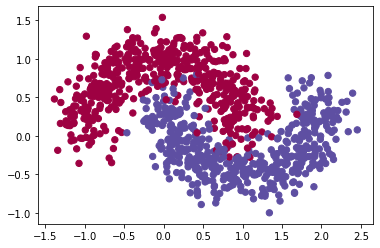

Loss after iteration 0: 0.584312
Loss after iteration 500: 0.028454
Loss after iteration 1000: 0.018644
Loss after iteration 1500: 0.015752
Loss after iteration 2000: 0.014589
Loss after iteration 2500: 0.014008
Loss after iteration 3000: 0.013656
Loss after iteration 3500: 0.013410
Loss after iteration 4000: 0.013221
Loss after iteration 4500: 0.013067
Loss after iteration 5000: 0.012936
Loss after iteration 5500: 0.012822
Loss after iteration 6000: 0.012722
Loss after iteration 6500: 0.012634
Loss after iteration 7000: 0.012555
Loss after iteration 7500: 0.012484
Loss after iteration 8000: 0.012421
Loss after iteration 8500: 0.012364
Loss after iteration 9000: 0.012313
Loss after iteration 9500: 0.012266
Loss after iteration 0: 0.629010
Loss after iteration 500: 0.118868
Loss after iteration 1000: 0.086502
Loss after iteration 1500: 0.080324
Loss after iteration 2000: 0.077323
Loss after iteration 2500: 0.075143
Loss after iteration 3000: 0.073469
Loss after iteration 3500: 0.072120


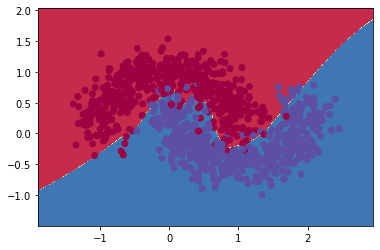

In [9]:
def main():
    
    # generate a random distribution and plot it.
	np.random.seed(0)
	X, Y = datasets.make_moons(1000, noise = 0.2)
	plt.scatter(X[:,0], X[:,1], s=40 , c=Y, cmap = plt.cm.Spectral)
	plt.show()
	batcherator = sample_minibatches(X,Y,100)

	# Train model
	for X_chunk, y_chunk in batcherator:
		model = build_training_model(X_chunk, y_chunk, 25)
 
    # Now make predictions with trained model
    # y_predicted = model.predict(X_test)

	# model = build_training_model(X, Y, 50)
	draw_visualization(X, Y, model)


if __name__ == "__main__":
    main()